In [2]:
# Data Wrangling II - Create an “Academic performance” dataset of students and perform the following operations using Python. 
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, 
# use any of the suitable techniques to deal with them. 2. Scan all numeric variables for outliers. 
# If there are outliers, use any of the suitable techniques to deal with them. 
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: 
# to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness 
# and convert the distribution into a normal distribution. Reason and document your approach properly.

In [2]:
import pandas as pd
import numpy as np

In [7]:
# Sample data
data = {
    'Student_ID': range(1, 11),
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian', 'Jack'],
    'Math_Score': [78, 85, 92, 88, np.nan, 76, 102, 55, 60, 95],  # 102 is an outlier, one missing value
    'Science_Score': [72, 80, 78, 85, 90, 70, 89, np.nan, 60, 105],  # 105 is an outlier
    'Attendance_Percentage': [85, 90, 75, 88, 70, 95, 100, 65, 82, 78]
}

In [15]:
# Create and save as CSV
df = pd.DataFrame(data)
df.to_csv('Academic_performance.csv', index=False)

In [11]:
# Load the dataset
df = pd.read_csv('Academic_performance.csv')

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

df.columns = df.columns.str.strip()

# Handle missing values (e.g., fill with mean for numeric columns)
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())

# Confirm replacement
print("\nAfter handling missing values:\n", df)


Missing Values:
 Student_ID               0
Name                     0
Math_Score               1
Science_Score            1
Attendance_Percentage    0
dtype: int64

After handling missing values:
    Student_ID     Name  Math_Score  Science_Score  Attendance_Percentage
0           1    Alice   78.000000           72.0                     85
1           2      Bob   85.000000           80.0                     90
2           3  Charlie   92.000000           78.0                     75
3           4    David   88.000000           85.0                     88
4           5      Eva   81.222222           90.0                     70
5           6    Frank   76.000000           70.0                     95
6           7    Grace  102.000000           89.0                    100
7           8    Helen   55.000000           81.0                     65
8           9      Ian   60.000000           60.0                     82
9          10     Jack   95.000000          105.0                     78

In [12]:
# Define a function to detect outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{column} - Outlier Range: ({lower_bound}, {upper_bound})")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
df = remove_outliers_iqr(df, 'Math_Score')
df = remove_outliers_iqr(df, 'Science_Score')

# Reset index after outlier removal
df.reset_index(drop=True, inplace=True)
print("\nData after removing outliers:\n", df)



Math_Score - Outlier Range: (54.75, 112.75)

Science_Score - Outlier Range: (51.75, 109.75)

Data after removing outliers:
    Student_ID     Name  Math_Score  Science_Score  Attendance_Percentage
0           1    Alice   78.000000           72.0                     85
1           2      Bob   85.000000           80.0                     90
2           3  Charlie   92.000000           78.0                     75
3           4    David   88.000000           85.0                     88
4           5      Eva   81.222222           90.0                     70
5           6    Frank   76.000000           70.0                     95
6           7    Grace  102.000000           89.0                    100
7           8    Helen   55.000000           81.0                     65
8           9      Ian   60.000000           60.0                     82
9          10     Jack   95.000000          105.0                     78


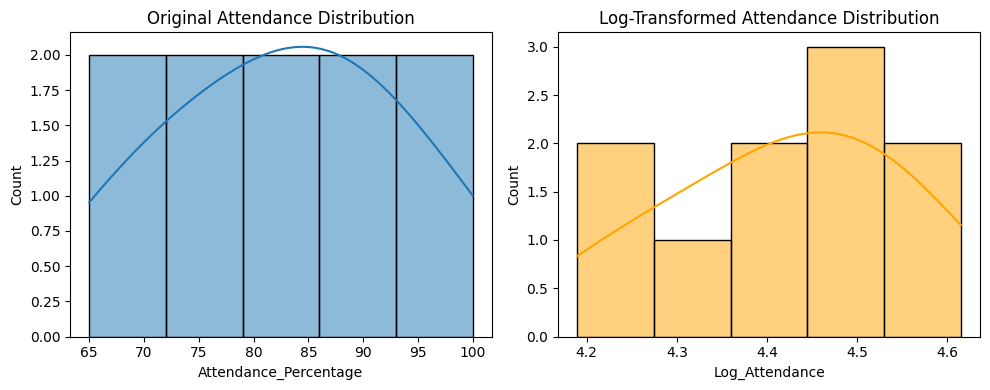

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Before transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Attendance_Percentage'], kde=True)
plt.title("Original Attendance Distribution")

# Apply log transformation
df['Log_Attendance'] = np.log1p(df['Attendance_Percentage'])

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Log_Attendance'], kde=True, color='orange')
plt.title("Log-Transformed Attendance Distribution")
plt.tight_layout()
plt.show()


In [14]:
print("\nFinal Processed Dataset:\n", df)



Final Processed Dataset:
    Student_ID     Name  Math_Score  Science_Score  Attendance_Percentage  \
0           1    Alice   78.000000           72.0                     85   
1           2      Bob   85.000000           80.0                     90   
2           3  Charlie   92.000000           78.0                     75   
3           4    David   88.000000           85.0                     88   
4           5      Eva   81.222222           90.0                     70   
5           6    Frank   76.000000           70.0                     95   
6           7    Grace  102.000000           89.0                    100   
7           8    Helen   55.000000           81.0                     65   
8           9      Ian   60.000000           60.0                     82   
9          10     Jack   95.000000          105.0                     78   

   Log_Attendance  
0        4.454347  
1        4.510860  
2        4.330733  
3        4.488636  
4        4.262680  
5        4.56434